## Linear Regression - Bike Share Assignment by Surya Chandra

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar

import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading the Data

In [3]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Renaming few columns for better readability

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#Column info fo the bike dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Finding the Rows & Columns of the Bike Dataset

bike.shape

(730, 16)

In [10]:
#Checking for the null values in Bike Dataset

bike.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#Checking the number of unique values for each column in bike dataset
bike.nunique()

instant       730
dteday        730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [12]:
#Making a copy of bike & dropping the duplicates, 

bike_copy = bike.copy()
bike_copy.drop_duplicates(subset=None, inplace=True)

print (bike_copy.shape == bike.shape)

True


### Observations:

There are no null/missing/duplicate values in any columns or rows in bike dataset

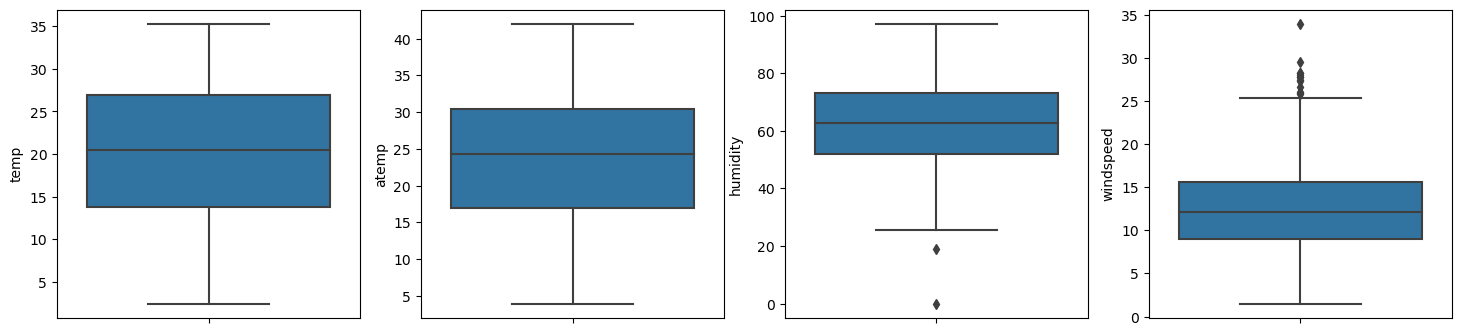

In [13]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

### Observation:
temp, atemp, humidity & windspeed are float type columns with no outliers

## Data Cleaning

In [14]:
bike_new = bike.copy()
bike_new.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

# [['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'humidity', 'windspeed','cnt']]
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
bike_new.shape

(730, 12)

#### Copied the dataframe to bike_new and dropped the unnecesary columns - instant(Just Index), dteday(Date), casual(count of users) & registered(count of registered users) columns

In [16]:
# Converting 'Season' to a categorical variable
bike_new['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike_new['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [17]:
# Converting 'month' to categorical variable 

bike_new['month'] = bike_new['month'].apply(lambda x: calendar.month_abbr[x])
bike_new['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [18]:
# Converting 'weathersit' to categorical variable 

bike_new['weathersit']= bike_new['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist', 'Light_Snow', 'Heavy_Rain'])
bike_new['weathersit'].value_counts()

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

In [19]:
bike_new['weekday'] = bike_new['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
bike_new['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [20]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Converted Season, Month, Weekday & Weathersit columns into Categorical. Earlier they were of int64 Dtype now they are Object type post convertion

## EDA

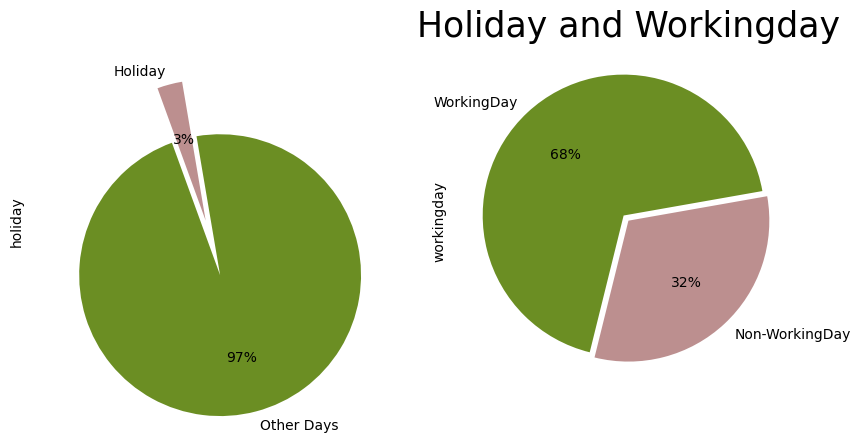

In [22]:
plt.figure(figsize = [10, 10])
colors = ['olivedrab', 'rosybrown']
plt.subplot(121) 
bike_new['holiday'].value_counts().rename({1: 'Holiday', 0: 'Other Days'}).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110, colors=colors)
plt.subplot(122)
bike_new['workingday'].value_counts().rename({0: 'Non-WorkingDay', 1: 'WorkingDay'}).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10, colors=colors)
plt.title('Holiday and Workingday', fontsize = 25)
plt.show()

In [23]:
print(bike_new['holiday'].value_counts(),'\n')
print(bike_new['workingday'].value_counts())

0    709
1     21
Name: holiday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64


### Observations:
- Holdays are very less in number(21) so bike usage is more on other days(709)
- Same applies to Working day as the no of working days are more compared to non-working days

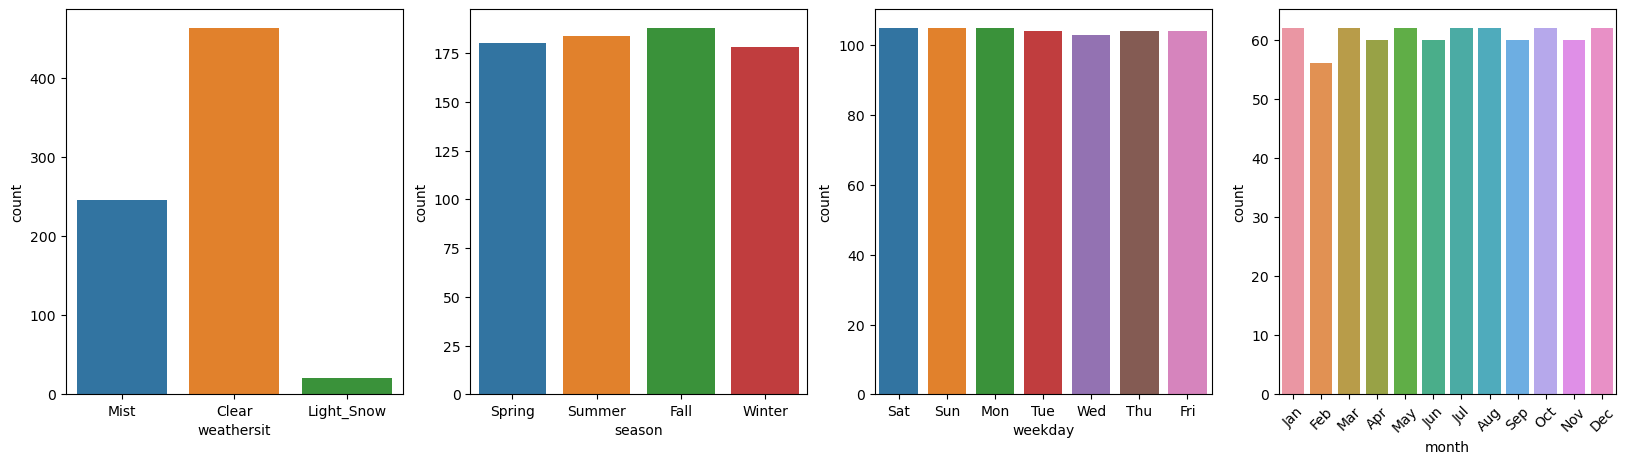

In [24]:
plt.figure(figsize = [20,5])
plt.subplot(141)
sns.countplot(data = bike_new, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = bike_new, x = 'season')
plt.subplot(143)
sns.countplot(data = bike_new, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bike_new, x = 'month')
plt.show()

### Observations:
- More Bike usages on Clear Days
- Rest all variables are almost same so can't make any conclusions


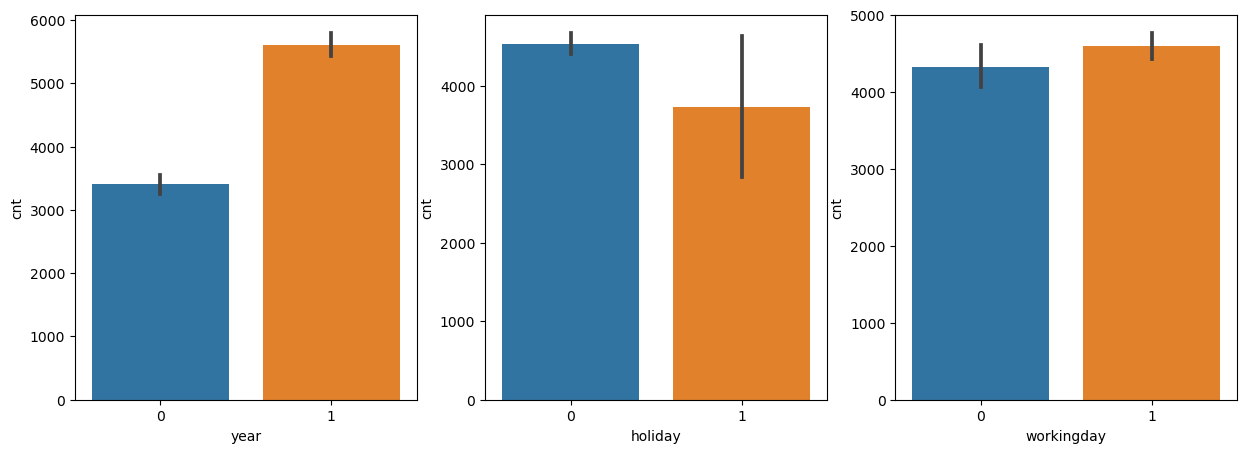

In [25]:
plt.figure(figsize = [15,5])
plt.subplot(131)
sns.barplot(x = 'year', y = 'cnt', data = bike_new)
plt.subplot(132)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(133)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()

### Observations:
- More bikes usage in year 2019.
- Less bike usage during holidays(1) as compared to Non holidays(0).
- Very less usage difference of bike users betweens a working day(1) and non-working day(0).

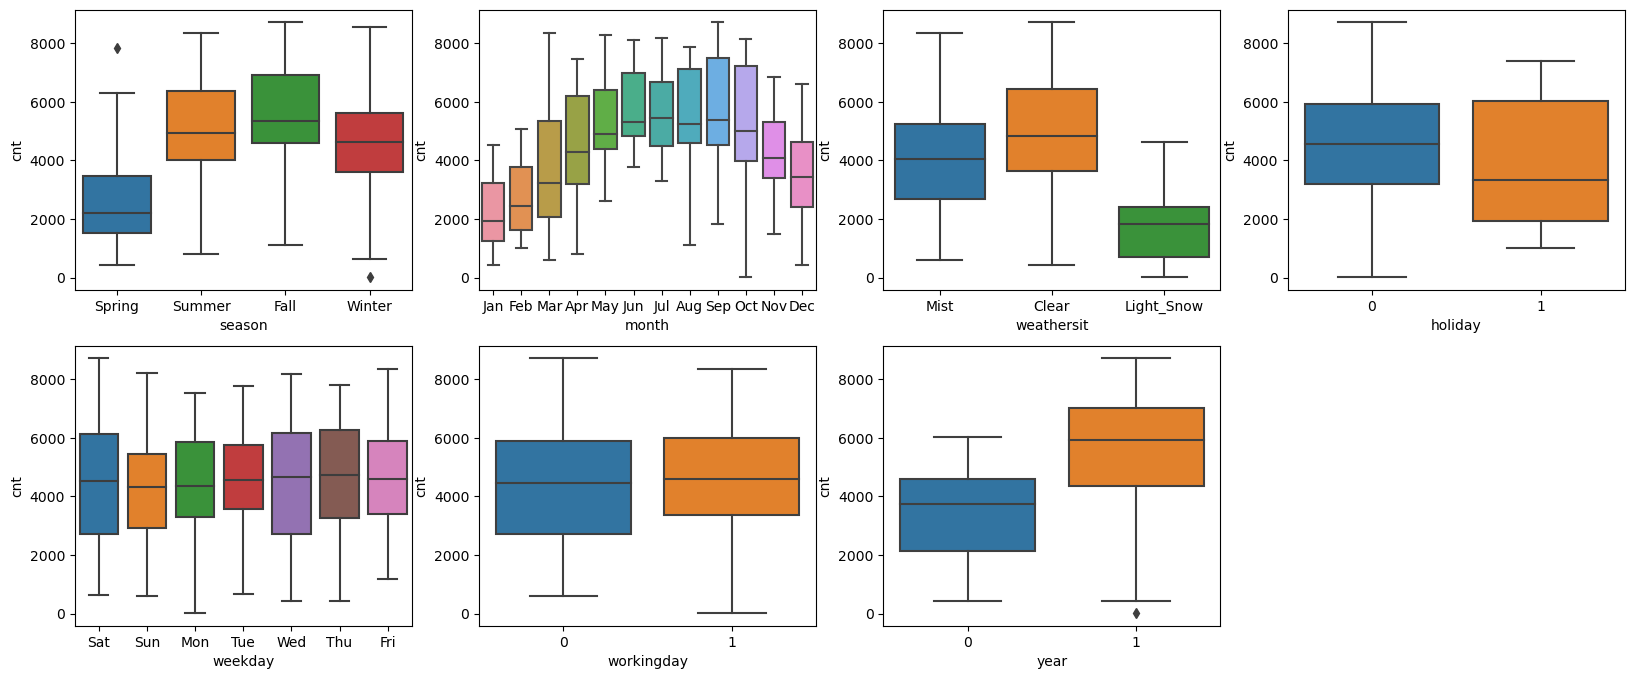

In [26]:
plt.figure(figsize=(20, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data =bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_new)

plt.show()

In [27]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y = 'cnt',data = bike_new)
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = 'cnt',data = bike_new, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

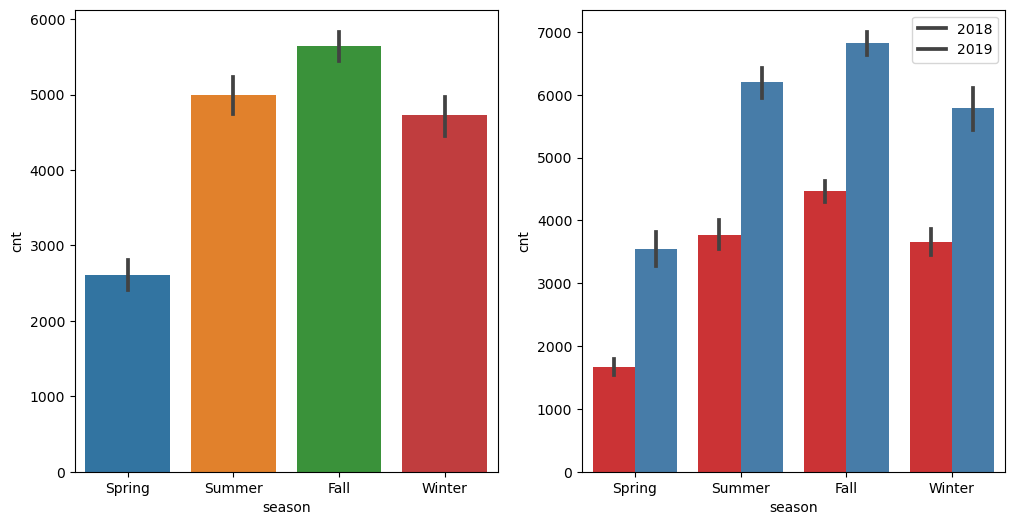

In [28]:
plot_cat_columns('season')

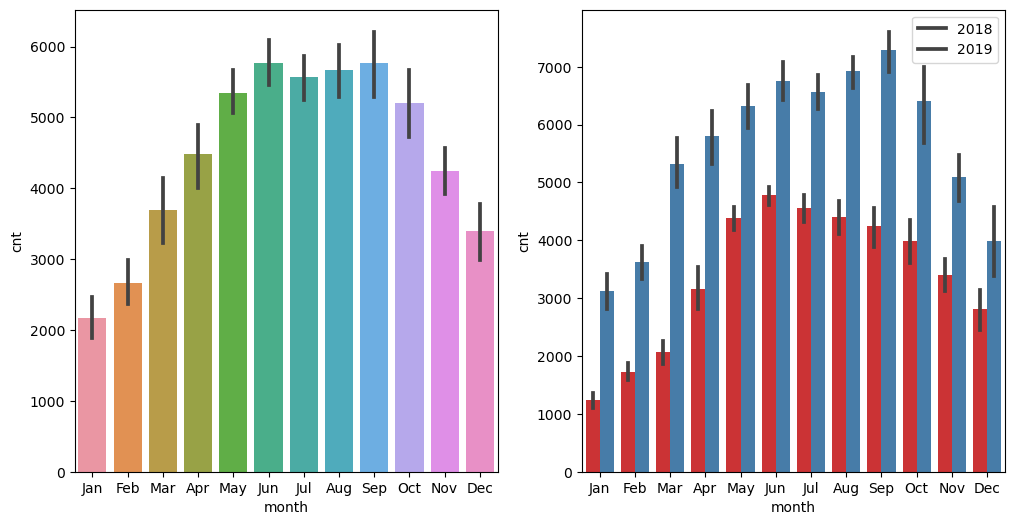

In [29]:
plot_cat_columns('month')

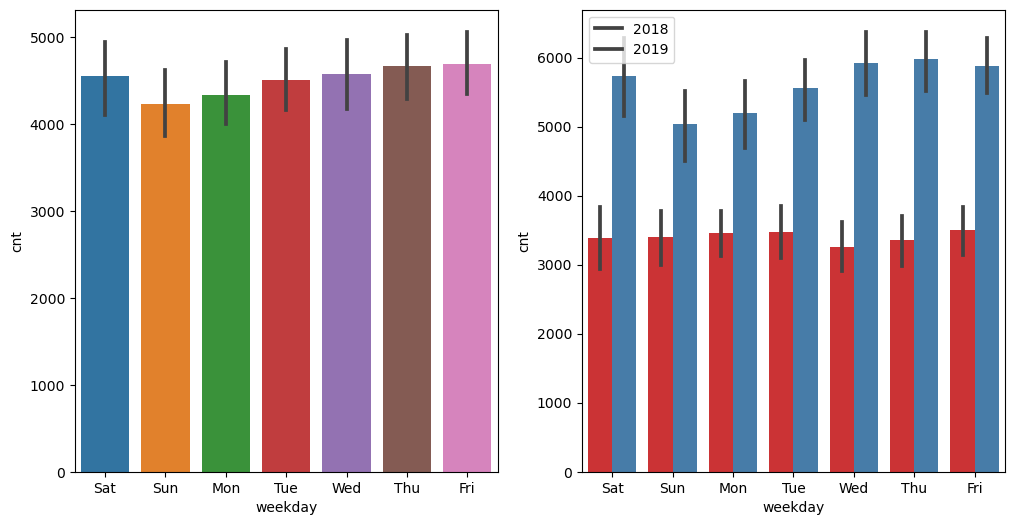

In [30]:
plot_cat_columns('weekday')

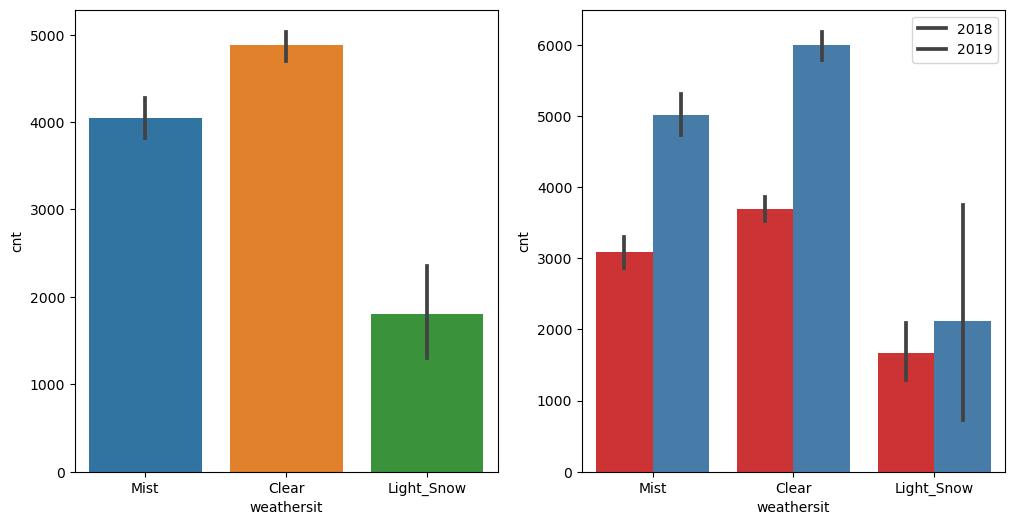

In [31]:
plot_cat_columns('weathersit')

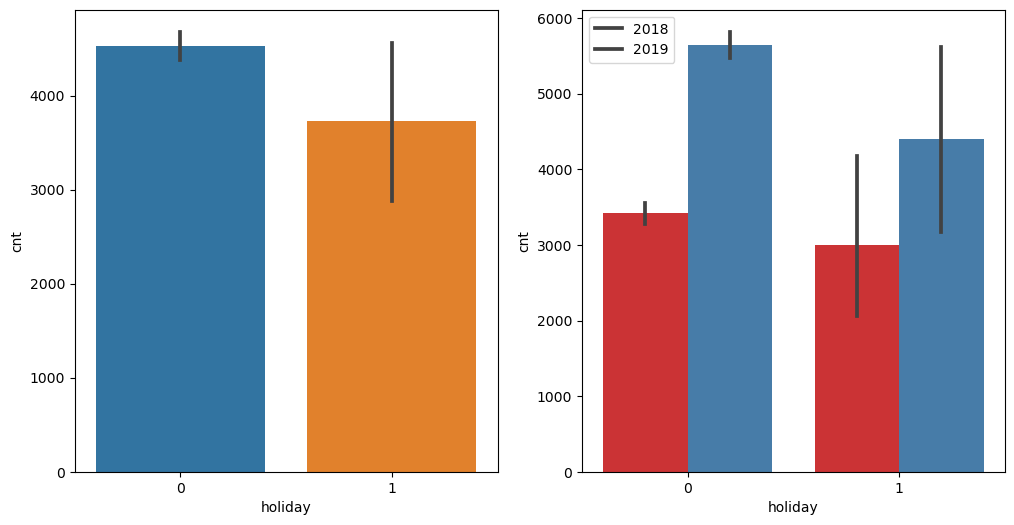

In [32]:
plot_cat_columns('holiday')

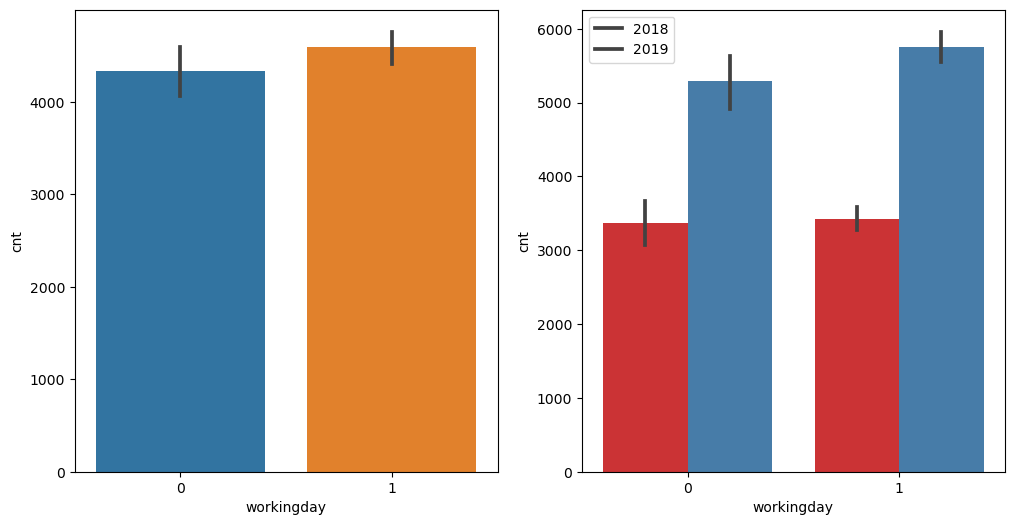

In [33]:
plot_cat_columns('workingday')

### Observations:

- **Season**: More no of bookingd during Summer & Fall. Season can be a good predictor for the dependent variable.

 - **Month**: No of bookings increased significantly from month to month & reduced after september. So Month can also be a good predictor for the dependent variable.

 - **Weathersit**: Weathersit can be a good predictor for the dependent variable as more number of usage in clear weather.

- **Holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

- **Weekday**: weekday variable shows very close trend & this variable can have some or no influence towards the predictor. So we can't come to conclusion yet if this a good predictor or not.

 - **Workingday**: Workingday can be a good predictor for the dependent variable as more bike users on workingdays.
 - **Year**: Year can be a good predictor as the no of booking increased in 2019 comapred to 2018.

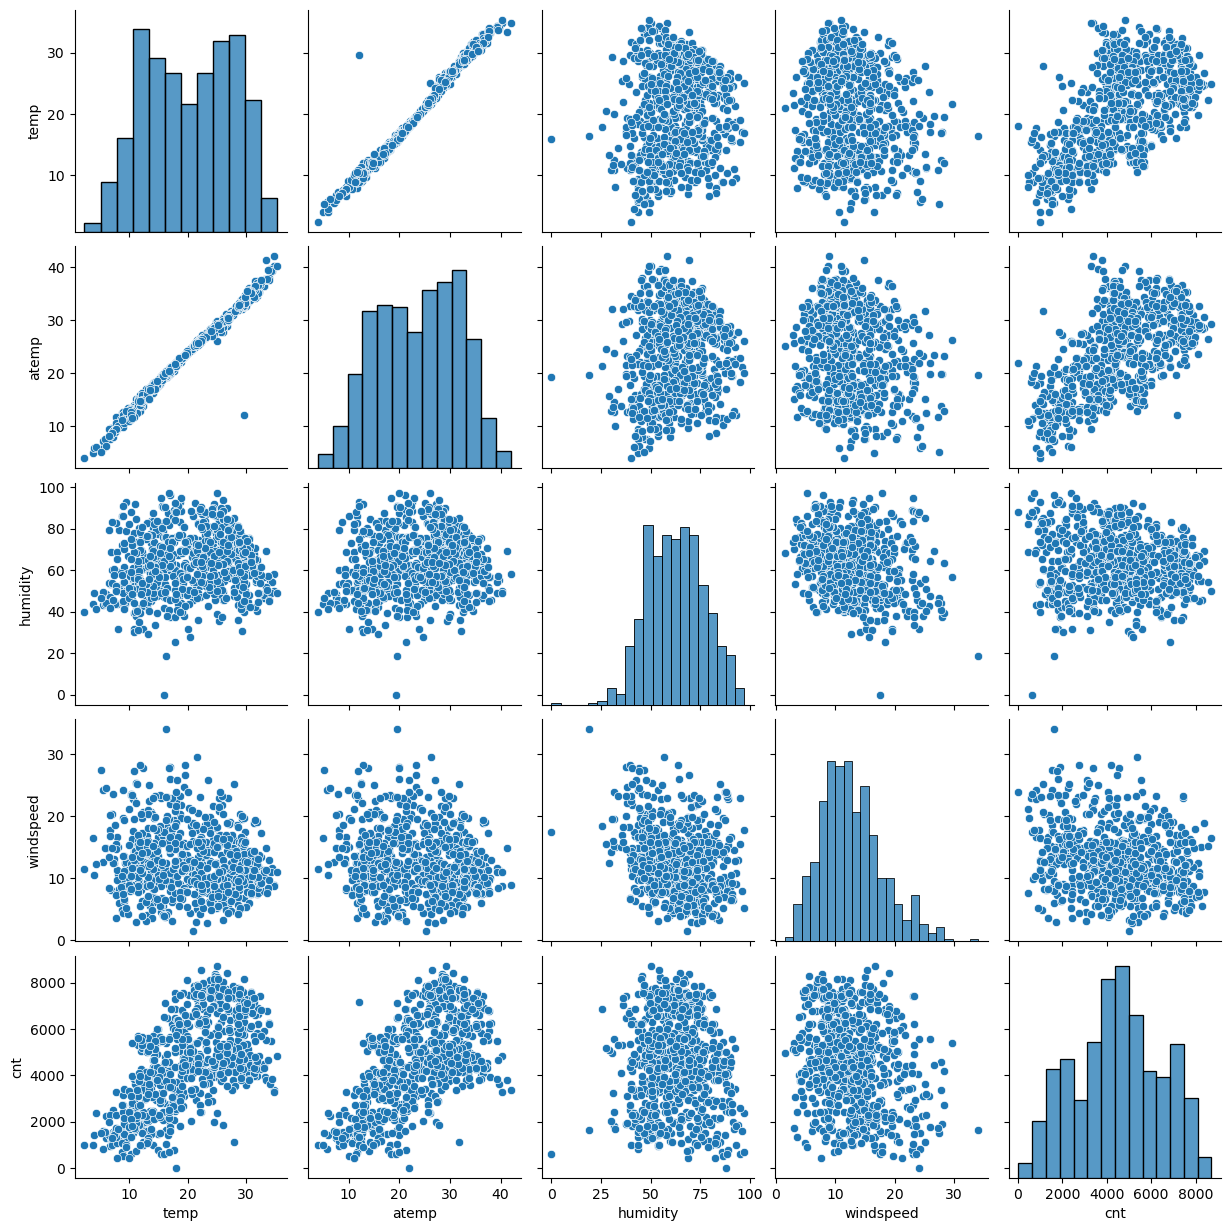

In [34]:
sns.pairplot(data = bike_new,vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

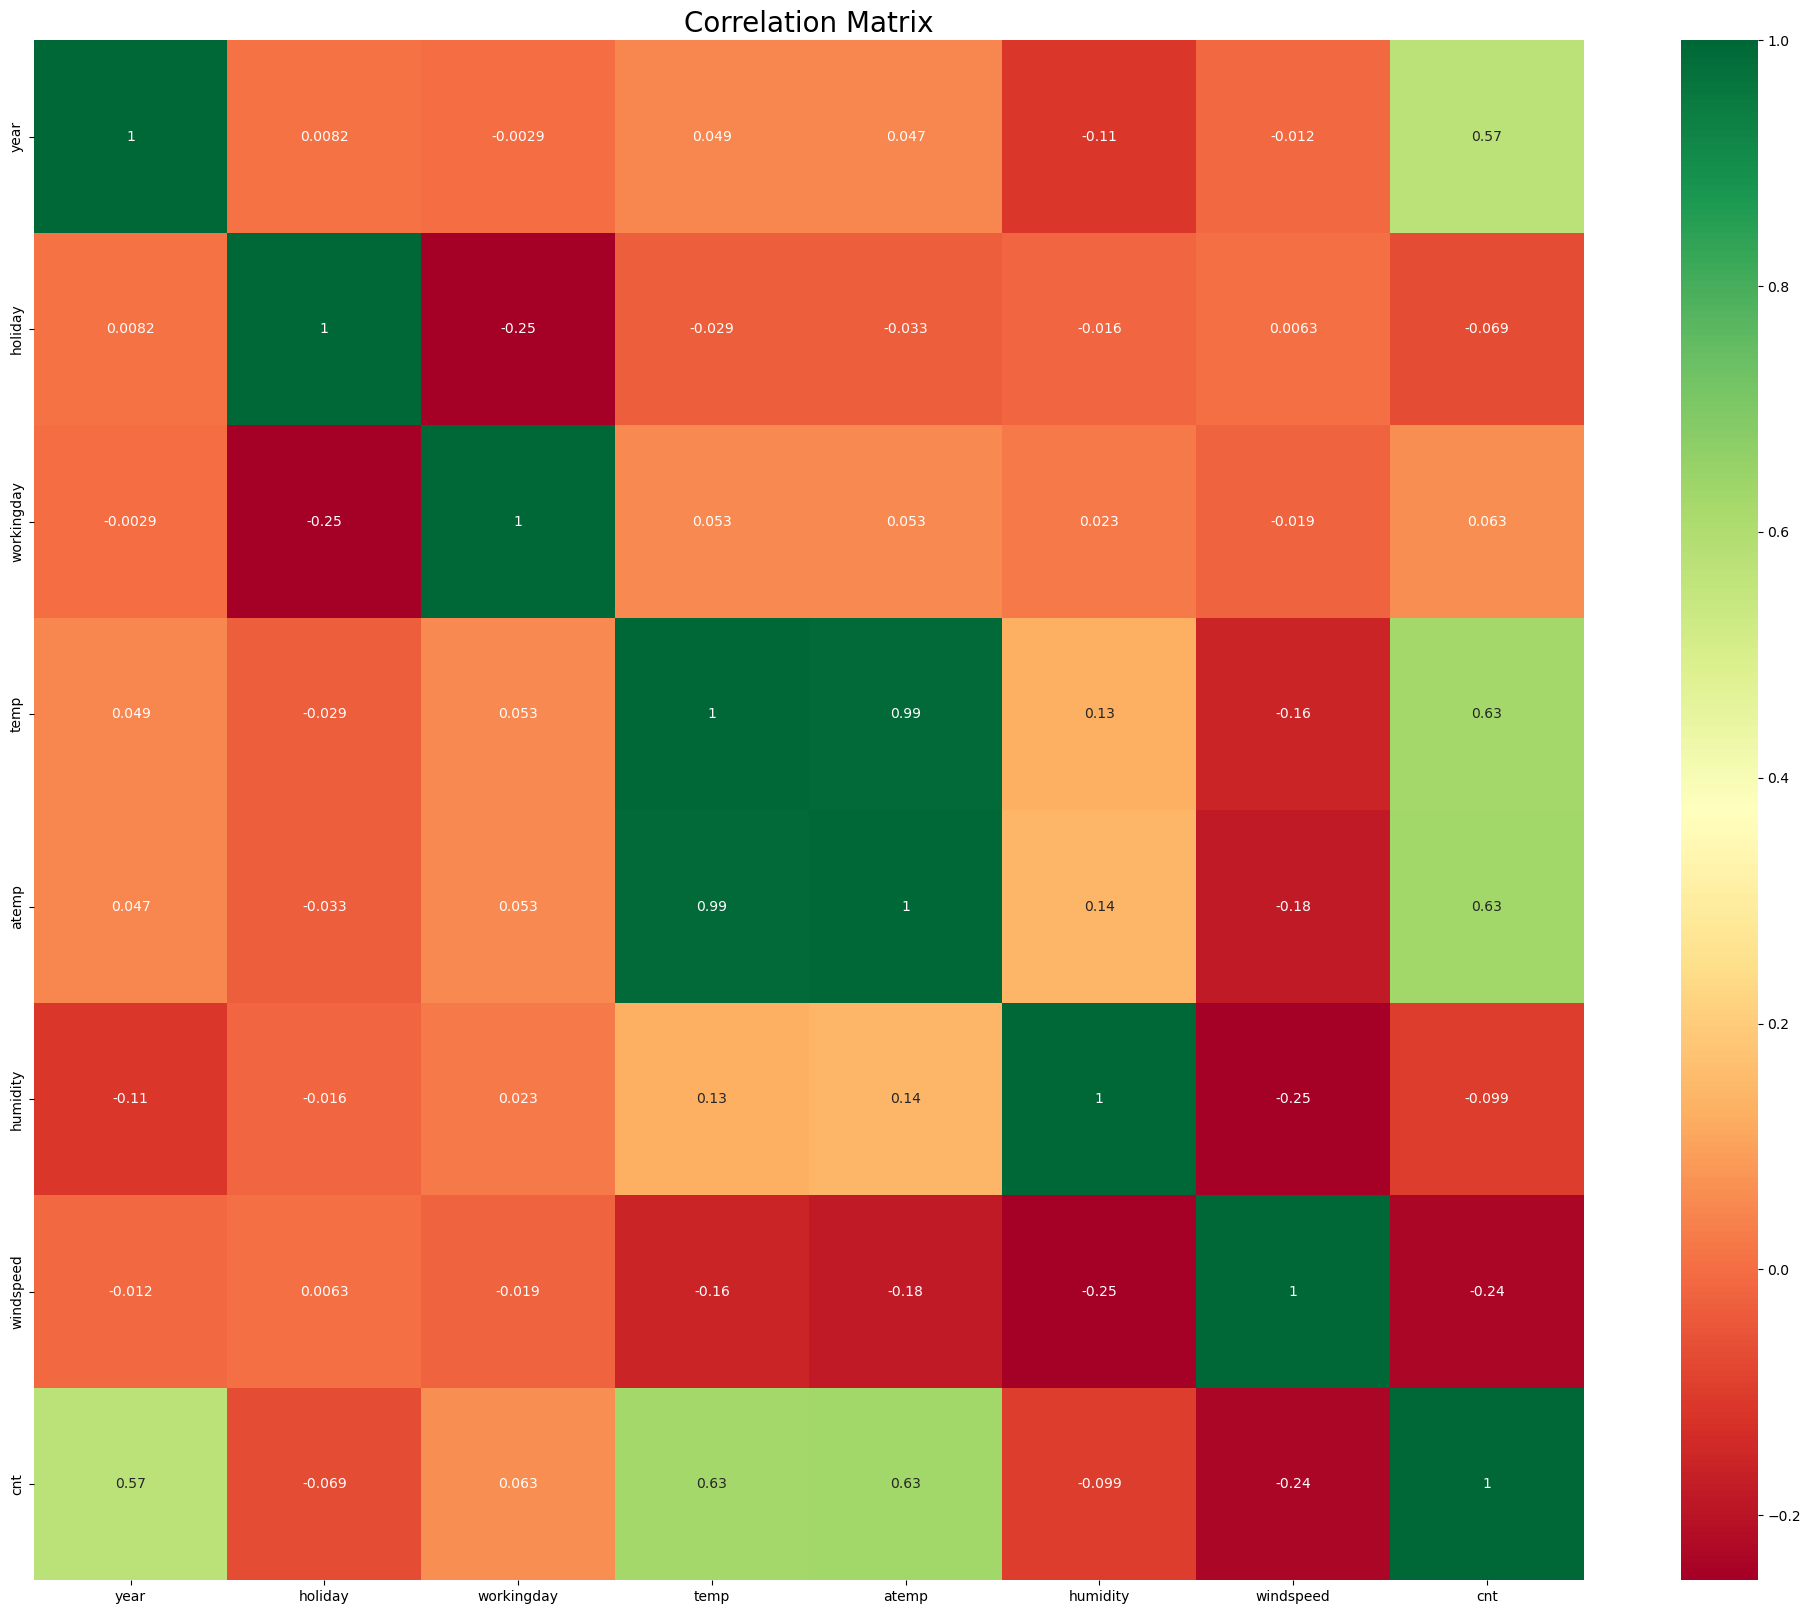

In [35]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdYlGn")
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

In [36]:
bike_new.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Create Dummy Variables

In [37]:
bike_new = pd.get_dummies(data = bike_new, columns = ['season', 'month', 'weekday'], drop_first = True)
bike_new = pd.get_dummies(data = bike_new, columns = ['weathersit'])

In [38]:
bike_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [39]:
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [40]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_Spring          730 non-null    uint8  
 9   season_Summer          730 non-null    uint8  
 10  season_Winter          730 non-null    uint8  
 11  month_Aug              730 non-null    uint8  
 12  month_Dec              730 non-null    uint8  
 13  month_Feb              730 non-null    uint8  
 14  month_Jan              730 non-null    uint8  
 15  month_

### Splitting data into train and test data

In [41]:
bike_new.shape

(730, 31)

In [42]:
#y to contain only target variable
y=bike_new.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_new

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
# Valdating shape and size for train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 30)
(219, 30)
(511,)
(219,)


In [45]:
# Scaling continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform of training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [46]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,1,0,0,1


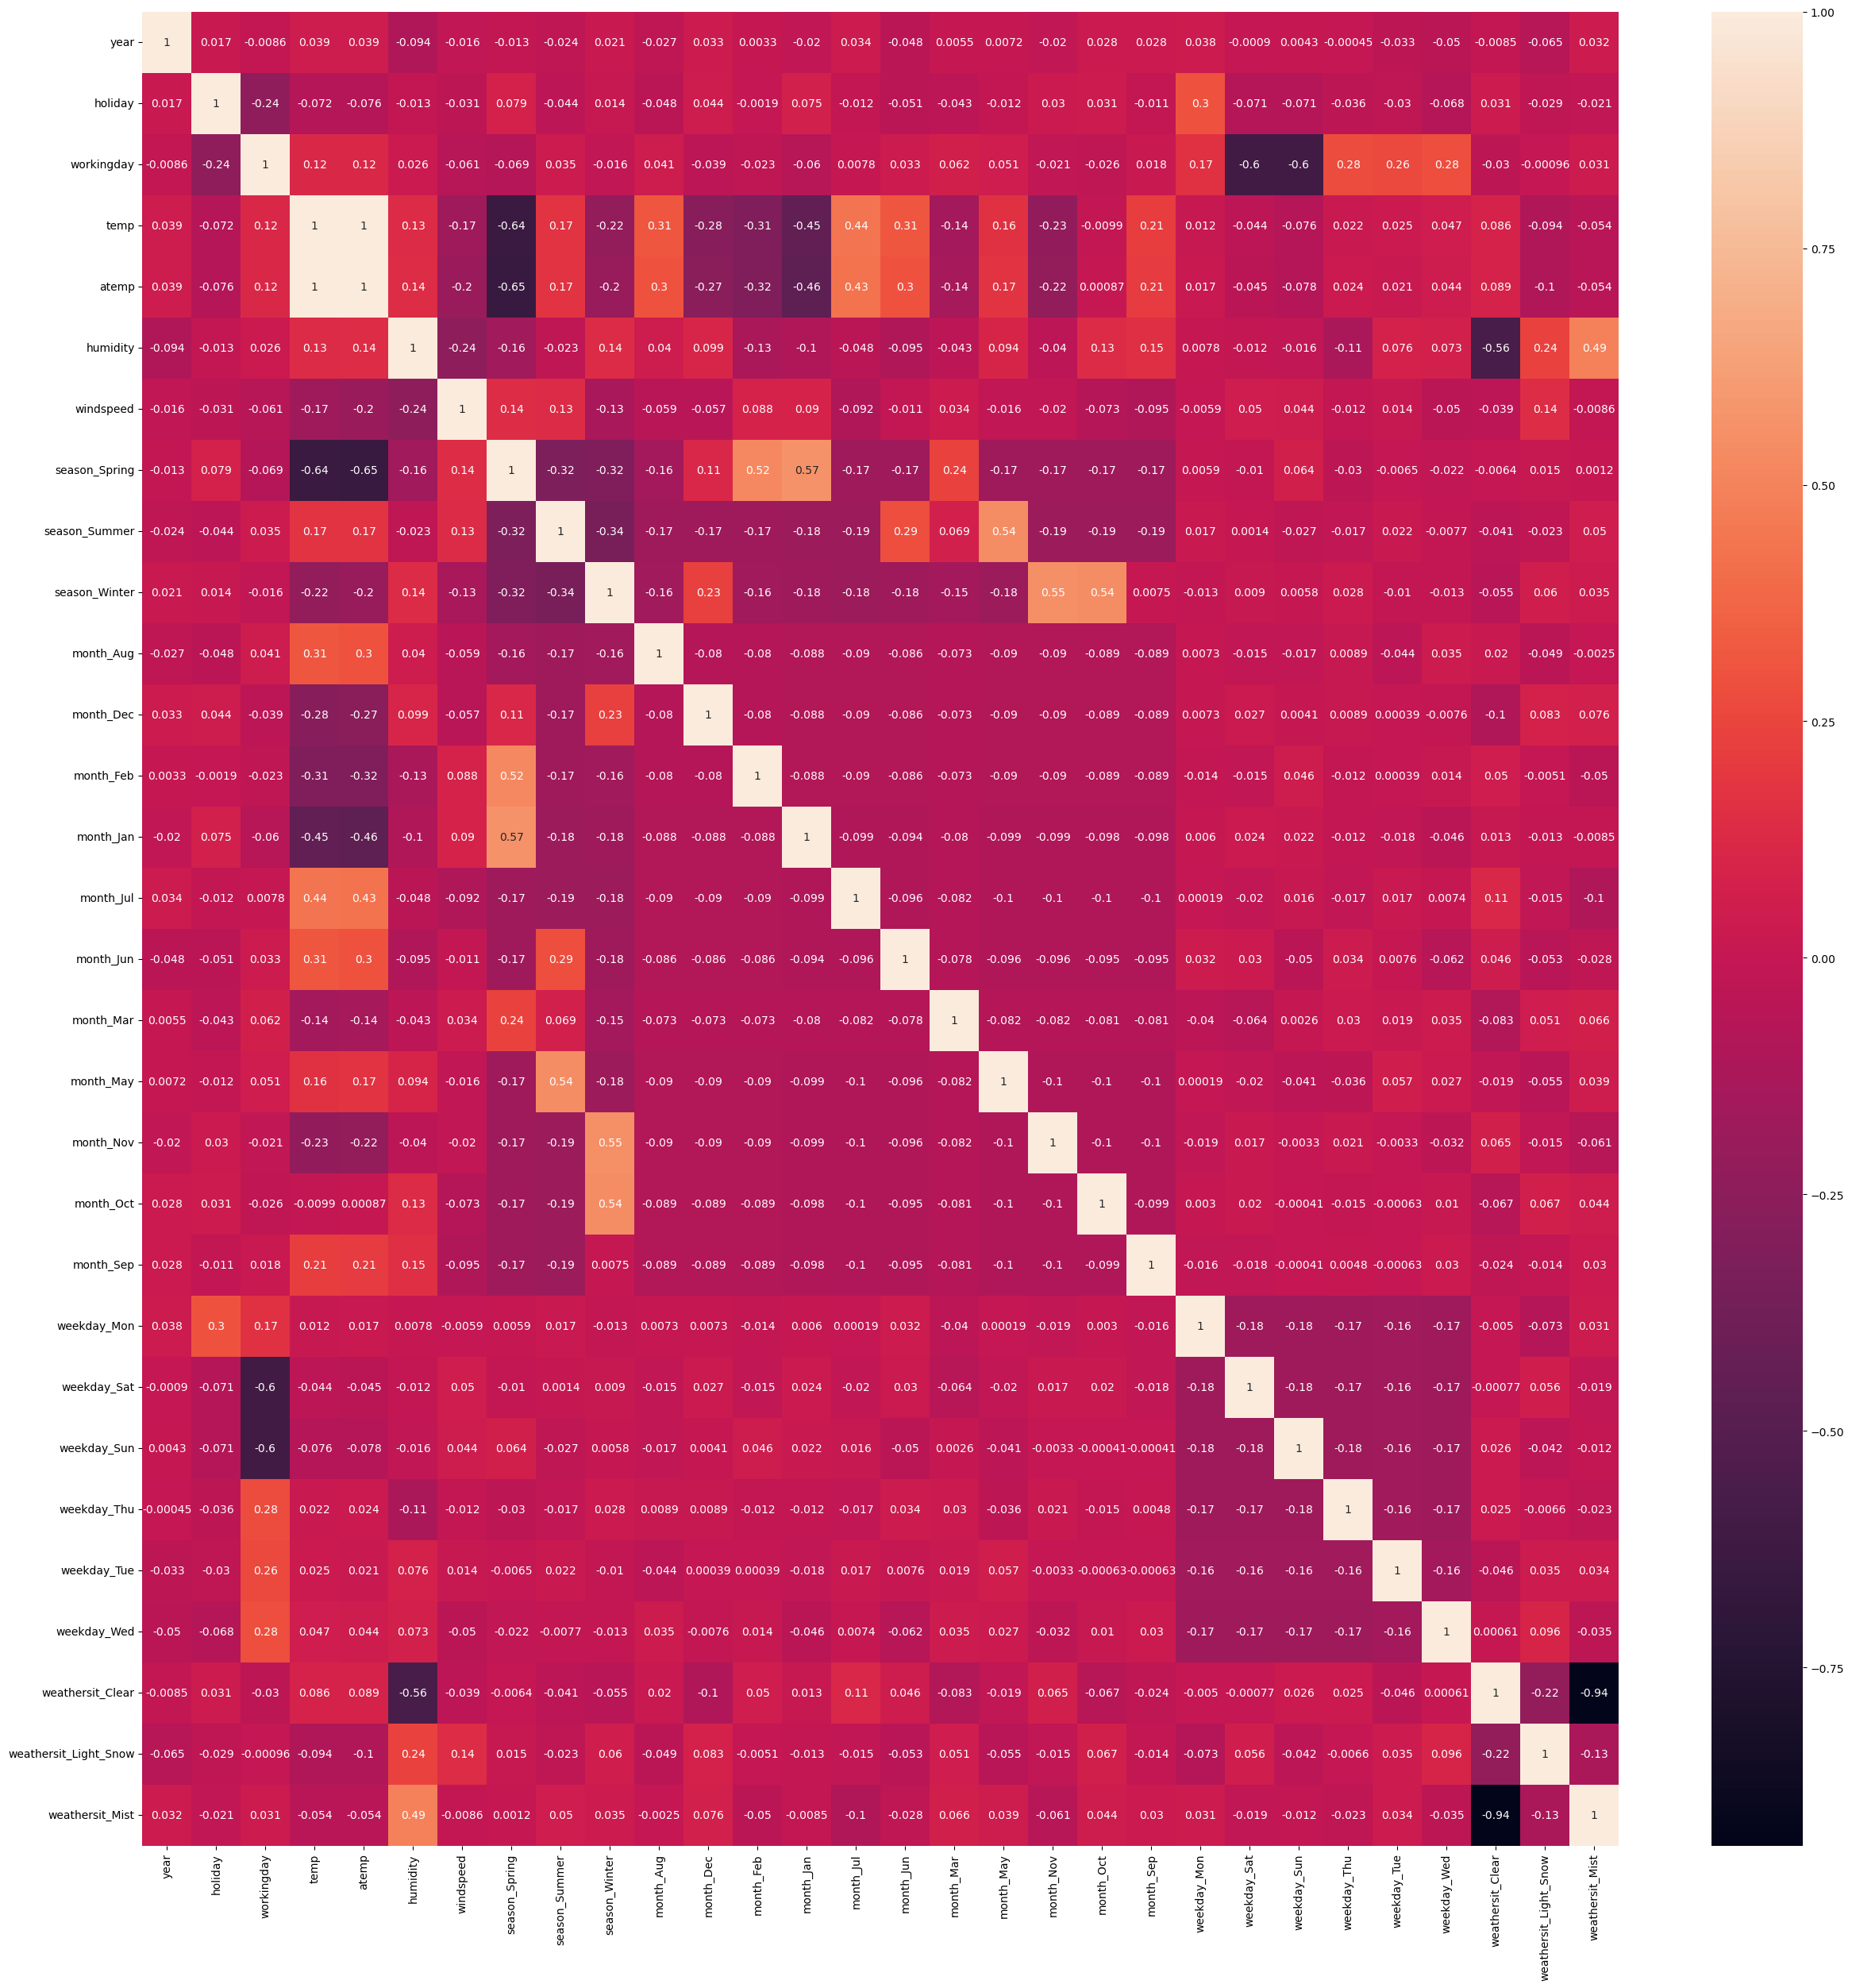

In [48]:
#Validating if the variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Build model using RFE (Recursive Feature Elimination)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
#Cutting down the number of features to 15 using automated approach
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', True, 1),
 ('month_Feb', False, 10),
 ('month_Jan', False, 9),
 ('month_Jul', False, 2),
 ('month_Jun', False, 15),
 ('month_Mar', False, 5),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sep', False, 3),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [52]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [53]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [54]:
#Print Columns selected by RFE. I will manually eliminate for these columns in each model by dropping the hig VIF column
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [55]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_Summer', 'month_Aug', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [56]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Mist']]

In [57]:
X_train_rfe.shape

(511, 15)

## Model-1

In [58]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Mist']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.92e-183
Time:                        21:06:47   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1450.10

### Model-2

In [59]:
# Dropping the variable holiday due to infinite VIF
cols = ['year', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.92e-183
Time:                        21:06:47   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1402.16

### Model-3

In [60]:
# Dropping the variable weathersit_Clear due to high VIF
cols = ['year', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun',
       'weathersit_Light_Snow', 'weathersit_Mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.92e-183
Time:                        21:06:47   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2669.46

### Model-4

In [61]:
# Dropping the variable humidity due to high VIF
cols = ['year', 'workingday', 'atemp', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun',
       'weathersit_Light_Snow', 'weathersit_Mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          4.92e-182
Time:                        21:06:47   Log-Likelihood:                -4141.8
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2001.09

### Model-5

In [62]:
# Dropping the variable workingday due to high VIF
cols = ['year', 'atemp', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun',
       'weathersit_Light_Snow', 'weathersit_Mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          3.68e-181
Time:                        21:06:47   Log-Likelihood:                -4146.7
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2648.74

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82
Hence I can finalize this model to use further

In [63]:
#Building a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [64]:
#Building the finalmodel using sklearn with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2648.748653413155 [ 2008.19554744  3311.51043788  -703.12225091 -1363.29170466
   735.11077179  -705.79546759  -826.14272337    63.95170794
  -336.5782857  -2223.3995471   -654.98095183]


### Residual Analysis

In [65]:
y_train_pred = lr.predict(X_train[cols])

In [66]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

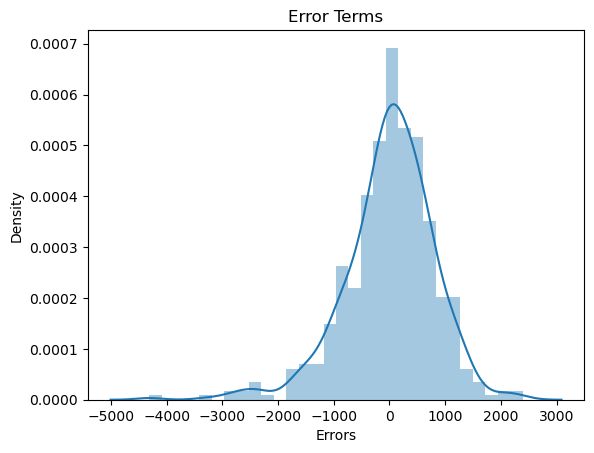

In [67]:
plot_res_dist(y_train, y_train_pred)

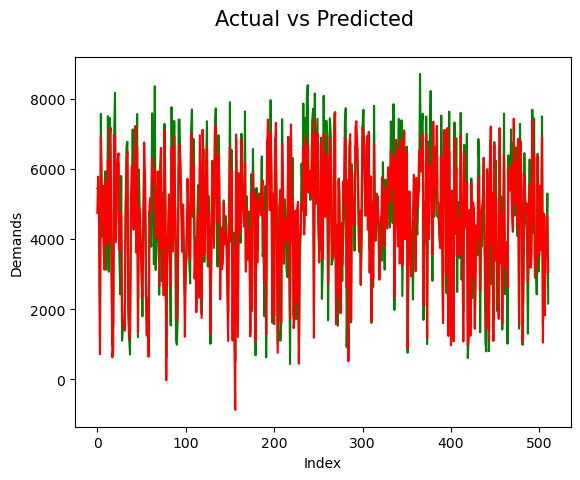

In [68]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## R-Squared Values

In [69]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8254647175928351

In [70]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [71]:
#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [72]:
# Calculating R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8138219266412963

## Evaluating the model

In [73]:
#evaluating the model based on r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8138219266412963

Text(0, 0.5, 'y_pred')

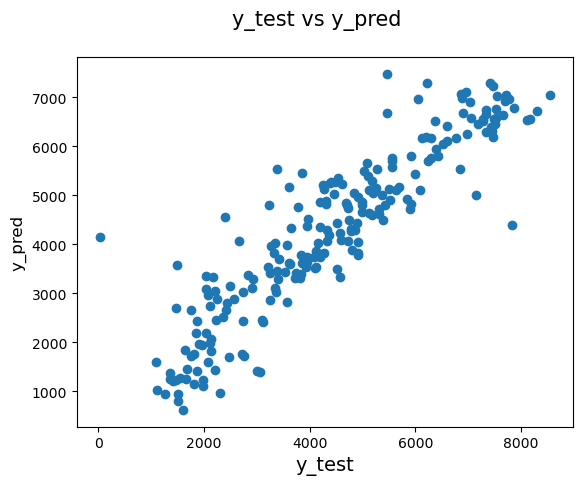

In [74]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [75]:
#Rebuilding the final model of manual + RFE approach using statsmodel to interpret it

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          3.68e-181
Time:                        21:06:48   Log-Likelihood:                -4146.7
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2648.74

### Conclusion
Appropriate variables to predict the demand for shared bikes

- Temp
- Weathersit( Light Snow, Mist + Cloud)
- Year
- Humidity
- Windspeed
- Season
- Months(January, July, September, November, December)
- Sunday
- Holiday